In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

In [9]:
data=pd.read_csv("/content/Labsheet 5 Sales.csv")

In [10]:
x=data['GrLivArea']
y=data['SalePrice']

x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]

In [11]:
alpha=0.01
iterations=2000
m=y.size
np.random.seed(123)
theta=np.random.rand(2)

In [12]:
def gradient_descent(x,y,theta,iterations,alpha):
  past_costs=[]
  past_thetas=[theta]
  for i in range(iterations):
    prediction=np.dot(x,theta)
    error=prediction-y
    cost=(1/(2*m)*np.dot(error.T,error))
    past_costs.append(cost)
    theta=theta-(1/m)*alpha*(np.dot(x.T,error))
    past_thetas.append(theta)
  return past_thetas,past_costs

In [13]:
past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
theta=past_thetas[-1]
print("Gradient Descent: {:,.2f}, {:,.2f}".format(theta[0],theta[1]))

'''print("Gradient Descent:{:,2f},{:,2f}".format(theta[0],theta[1]))'''

Gradient Descent: 180,921.20, 56,294.90


'print("Gradient Descent:{:,2f},{:,2f}".format(theta[0],theta[1]))'

In [20]:
fig=plt.figure()
ax=plt.axes()
plt.title('sale price vs living area')
plt.xlabel('living area')
plt.ylabel('sale price')
plt.scatter(x[:,1],y,color='red')
Line, =ax.plot([],[],lw=2)
annotation=ax.text(-1,700000,'')
annotation.set_animated(True)
plt.close()

def init():
  Line.set_data([],[])
  annotation.set_text('')
  return Line,annotation

In [16]:
def animate(i):
  x=np.linspace(-5,20,1000)
  y=past_thetas[i][1]*x+past_thetas[i][0]
  Line.set_data(x,y)
  annotation.set_text('cost={:.2f}'.format(past_costs[i]/10000000000))
  return Line,annotation

In [23]:
anim=animation.FuncAnimation(fig,animate,init_func=init,frames=300,interval=0,blit=True)
anim.save('animation.gif',writer='imagemagick',fps=30)


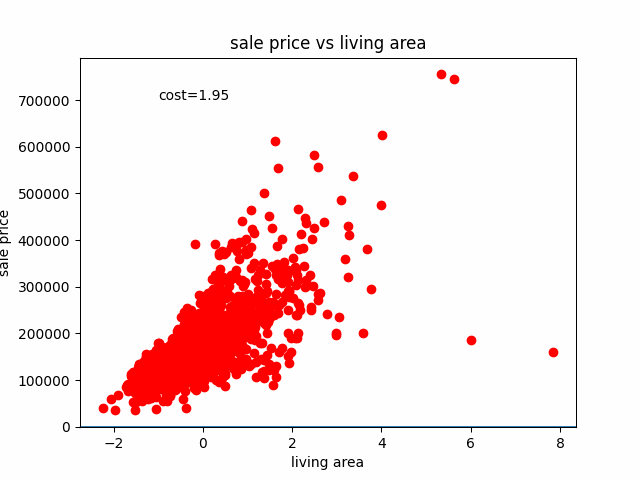

In [24]:
import io
import base64
from IPython.display import HTML
filename='animation.gif'
Video=io.open(filename,'r+b').read()
encoded=base64.b64encode(Video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif"/>'''.format(encoded.decode('ascii')))
